# Simple generate & write example

## tmp
In case you have difficulties with the tmp directory, modify the script <br>
you can give an explicit path to the tmp directory. <br>


## Structure
Your are working on a file system structure like this:
```
.
├── notebooks
│   ├── notebook1.ipynb
│   ├── notebook2.ipynb ... and so on
├──  include
│   ├── include1.py  .. the NEEDED include files
│   ├── include2.py
├── data
├── tests ... with python test files

you need to call get_script_directory() in order to access the data <br>
that is the reason why this function is included in the script
```

In [1]:
# the usual imports
import sys
import os
import json
import numpy as np
import random

In [14]:
# call the script for getting all paths
def get_script_directory(n_levels_up=0, explicit_tmp_dir=None):
    main_dir = ''
    script_dir = ''
    include_dir = ''
    temp_dir = '/tmp'
    try:
        # Check if running in a standard Python script
        script_dir = os.path.dirname(os.path.abspath(__file__))
        # return script_dir
    except NameError:
        # If __file__ is not defined, we are likely in a Jupyter Notebook
        from IPython import get_ipython
        if 'IPKernelApp' in get_ipython().config:
            script_dir = os.getcwd()
        else:
            raise RuntimeError("Unable to determine the script directory")
    # cd up n_levels_up
    main_dir = script_dir
    for i in range(n_levels_up):
        main_dir = os.path.dirname(main_dir)
    include_dir = os.path.join(main_dir, 'include')
    # leave the temporary directory to the user
    if explicit_tmp_dir is not None:
        temp_dir = explicit_tmp_dir
        return main_dir, script_dir, include_dir, temp_dir
    # else we try the simplest way to get the temporary directory
    # determine if we run Linux, MacOS or Windows
    if sys.platform == 'linux':
        temp_dir = '/tmp'
    elif sys.platform == 'darwin':
        temp_dir = '/tmp'
    elif sys.platform == 'win32':
        temp_dir = os.environ['TEMP']
    else:
        raise RuntimeError("Unknown platform")

    # return all directories
    return main_dir, script_dir, include_dir, temp_dir

# get the directories
main_dir, script_dir, include_dir, temp_dir = get_script_directory(1)
# add the include directory to the path
sys.path.append(include_dir)
# and load the necessary functions
import atss_file as atss
import atss_extended as atss_ext

We create channel 2, which is Hx in general. <br>
(0 = Ex, 1 = Ey, 2 = Hx, 3 = Hy, 4 = Hz) <br>

In [13]:
# create a channel
# crate an empty header file
# set a channel; I indicate already _2 as the channel number
channel_2 = atss.channel()
# let's look what has been created
print(json.dumps(channel_2, indent=2))

{
  "serial": 0,
  "system": "",
  "channel_no": 0,
  "channel_type": "",
  "sample_rate": 0.0,
  "datetime": "1970-01-01T00:00:00.0",
  "latitude": 0.0,
  "longitude": 0.0,
  "elevation": 0.0,
  "azimuth": 0.0,
  "tilt": 0.0,
  "resistance": 0.0,
  "units": "mV",
  "filter": "",
  "source": "",
  "sensor_calibration": {
    "sensor": "",
    "serial": 0,
    "chopper": 0,
    "units_frequency": "Hz",
    "units_amplitude": "mV/nT",
    "units_phase": "degrees",
    "datetime": "1970-01-01T00:00:00",
    "Operator": "",
    "f": [
      0.0
    ],
    "a": [
      0.0
    ],
    "p": [
      0.0
    ]
  }
}


In [15]:
# set some values, sensor, that is in the sensor_calibration dictionary
# that is the only "sub-dictionary" in the channel dictionary
channel_2['sensor_calibration']['sensor'] = 'MFS-06e'
channel_2['sensor_calibration']['serial'] = 12
channel_2['sensor_calibration']['chopper'] = 1 # you want to know this if you use a theoretical function
channel_2['sensor_calibration']['datetime'] = '2018-12-01T14:30:00'
# add f, a, p arrays, let's say 4 values; leave empty in case of E
# I add a real calibration for a sensor, so this part is long ....
channel_2['sensor_calibration']['f'] = [0.1,
      0.12328,
      0.15199,
      0.18738,
      0.23101,
      0.2848,
      0.35112,
      0.43288,
      0.53367,
      0.6579,
      0.8111,
      1.0,
      1.2329,
      1.5199,
      1.8738,
      2.3101,
      2.8481,
      3.5112,
      4.3288,
      5.3368,
      6.579,
      8.111,
      10.0,
      12.329,
      15.199,
      18.738,
      23.102,
      28.481,
      35.112,
      43.288,
      53.368,
      65.79,
      81.11,
      100.0,
      123.29,
      151.99,
      187.39,
      231.02,
      284.81,
      351.13,
      432.89,
      533.68,
      657.9,
      811.2,
      1000.0,
      1232.9,
      1520.0,
      1873.9,
      2310.2,
      2848.1,
      3511.3,
      4328.9,
      5336.9,
      6579.5,
      8111.5,
      10000.0]
channel_2['sensor_calibration']['a'] = [19.996,
      24.6523016,
      30.382800999999994,
      37.438524,
      46.1442475,
      56.84892800000001,
      69.90799200000001,
      86.0911744,
      105.9388317,
      130.00761900000003,
      159.283818,
      194.61999999999998,
      236.91406400000002,
      286.212369,
      342.980352,
      406.04627700000003,
      474.123207,
      542.3750640000001,
      608.066536,
      667.1533680000001,
      716.97942,
      757.1375170000001,
      787.17,
      808.486504,
      825.290501,
      834.2344979999999,
      840.6586779999999,
      846.797092,
      850.201968,
      854.4185439999999,
      853.727896,
      853.9542,
      855.06162,
      856.4399999999999,
      855.6326,
      852.527109,
      855.9038250000001,
      855.651876,
      855.085063,
      855.2473409999999,
      854.2651260000001,
      853.514424,
      852.57261,
      851.27328,
      849.17,
      846.361192,
      842.2472,
      836.88374,
      832.295754,
      817.376219,
      792.289732,
      754.310825,
      694.223952,
      624.0589955,
      576.192291,
      541.64]
channel_2['sensor_calibration']['p'] = [88.616,
      88.289,
      87.922,
      87.441,
      86.853,
      86.135,
      85.239,
      84.154,
      82.816,
      81.171,
      79.203,
      76.863,
      73.87,
      70.39,
      66.315,
      61.611,
      56.378,
      50.655,
      44.694,
      38.777,
      33.061,
      27.846,
      23.141,
      19.031,
      15.712,
      12.717,
      10.406,
      8.3424,
      6.7183,
      5.3851,
      4.1381,
      3.2246,
      2.3577,
      1.6771,
      0.97707,
      0.54075,
      -0.24894,
      -0.8486900000000001,
      -1.4863,
      -2.1869,
      -2.9943,
      -3.9211,
      -4.987,
      -6.2847,
      -7.8523,
      -9.7464,
      -12.049,
      -14.838,
      -18.284,
      -23.049,
      -28.373,
      -34.692,
      -41.397,
      -46.517,
      -50.876,
      -57.081]
# set some values, system, which end up in the file name
channel_2['system'] = 'ADU-08e'
channel_2['serial'] = 82
# "again" the channel number, here now as numerical value
channel_2['channel_no'] = 2
channel_2['channel_type'] = 'Hx'
channel_2['sample_rate'] = 256.0
# some values for the json header, beginning with the start time
channel_2['datetime'] = '2020-12-01T14:30:00'
channel_2['latitude'] = 52.2
channel_2['longitude'] = 10.6
channel_2['elevation'] = 200.0
channel_2['azimuth'] = 0.0 # azimuth of the sensor, NORTH is 0.0
channel_2['tilt'] = 0.0 # azimuth of the sensor, HORIZONTAL is 0.0
#
# print the file name
print(atss.base_name(channel_2))


082_ADU-08e_C002_THx_256Hz


## writing
create a file name with (optional path) and filename(channel) <br>
the tmp directory is used to store the files <br>

In [16]:
# check the contents of channel 2
print(json.dumps(channel_2, indent=2))
file_name = os.path.join(temp_dir, atss.base_name(channel_2))
atss.write_header(channel_2, file_name) # avoid rounding errors, take full Hz or s
# reminder: the FILENAME contains the sampling rate, the header does not

{
  "serial": 82,
  "system": "ADU-08e",
  "channel_no": 2,
  "channel_type": "Hx",
  "sample_rate": 256.0,
  "datetime": "2020-12-01T14:30:00",
  "latitude": 52.2,
  "longitude": 10.6,
  "elevation": 200.0,
  "azimuth": 0.0,
  "tilt": 0.0,
  "resistance": 0.0,
  "units": "mV",
  "filter": "",
  "source": "",
  "sensor_calibration": {
    "sensor": "MFS-06e",
    "serial": 12,
    "chopper": 1,
    "units_frequency": "Hz",
    "units_amplitude": "mV/nT",
    "units_phase": "degrees",
    "datetime": "2018-12-01T14:30:00",
    "Operator": "",
    "f": [
      0.1,
      0.12328,
      0.15199,
      0.18738,
      0.23101,
      0.2848,
      0.35112,
      0.43288,
      0.53367,
      0.6579,
      0.8111,
      1.0,
      1.2329,
      1.5199,
      1.8738,
      2.3101,
      2.8481,
      3.5112,
      4.3288,
      5.3368,
      6.579,
      8.111,
      10.0,
      12.329,
      15.199,
      18.738,
      23.102,
      28.481,
      35.112,
      43.288,
      53.368,
      65.7

In [17]:
# create a numpy data array with random values, size 4096
data = np.array([random.random() for i in range(4096)])
# write the data
atss.write_data(data, file_name)
# finished demo part one

082_ADU-08e_C002_THx_256Hz
printing, /tmp/082_ADU-08e_C002_THx_256Hz


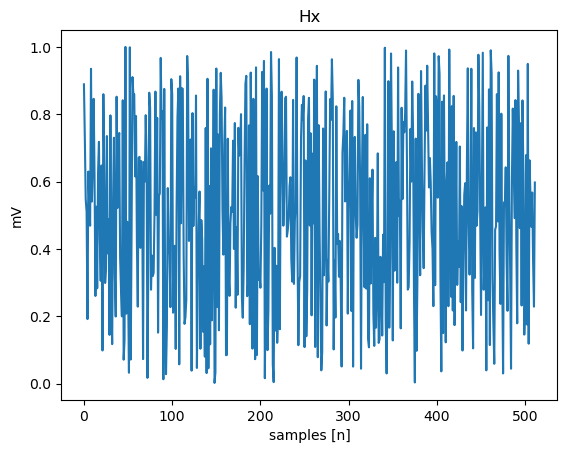

start date time 2020-12-01T14:30:00 stop date time 2020-12-01T14:30:16


In [19]:
# print the file name 
print(atss.base_name(channel_2))
atss_ext.plot_time_series_quick(file_name, 0, 512)
print("start date time", channel_2['datetime'], "stop date time", atss.stop_date_time(file_name))